# Project: Train car to drive up steep slope

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import gym
from agents.agent import DDPG

import matplotlib.pyplot as plt
%matplotlib inline

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

## Experiment with agent in gym

In [6]:
# This is nice if you interupt the learning while rendering.
# This will automatically close the previous session.
try:
    agent.task.close()
except:
    pass
from ounoise import OUNoise
noise = OUNoise(size=1, mu=0.0, theta=0.15, sigma=0.2)

# env = gym.make('MountainCarContinuous-v0')
env = gym.make('Pendulum-v0')
agent = DDPG(env, gym=True) 

state = agent.task.reset()

scores = []
best_score = -np.inf
best_traj = []
step_count = 0
for i_episode in range(1000):
    # Learning
    state = agent.reset_episode() # start a new episode
    noise.reset()
    score = 0.0
    for _ in range(500):
        step_count += 1
        action = agent.act(state) + noise()
        next_state, reward, done, _ = agent.task.step(action)
        score += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        agent.task.render()
        if done:
            break
    
    # Evaluate
#     if i_episode%1 == 0:
#         state = agent.reset_episode() # start a new episode
#         score = 0.0
#         for _ in range(300):
#             step_count += 1
#             action = agent.act(state) 
#             state, reward, done, _ = env.step(action)
#             score += reward
#             env.render()
#             if done:
#                 break

    scores.append(score)
    if score > best_score:
        best_score = agent.score
    print("\rEpisode: {:4d}, score: {:.3f}, best: {:.3f}, memory: {}".format(
        i_episode, score, best_score, len(agent.memory)), end="")

#     if score > 95:
#         break
    sys.stdout.flush()
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode:  189, score: -367.909, best: -0.187, memory: 38000000

KeyboardInterrupt: 

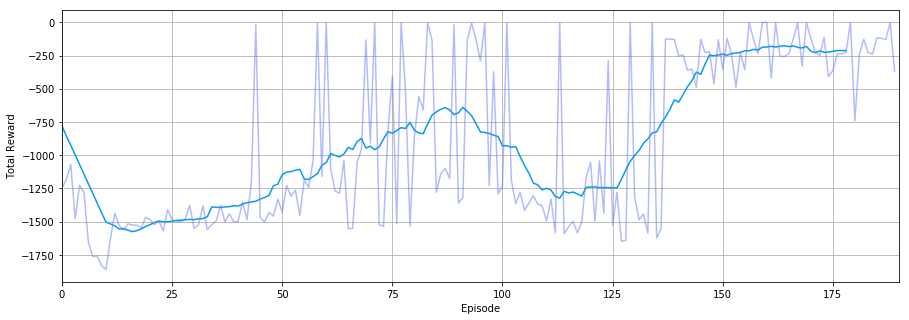

In [7]:
smooth = 21
plt.figure(figsize=(15,5))
plt.plot(np.convolve(scores, np.ones(smooth)/smooth)[(smooth-1)//2:-smooth], color='xkcd:azure')
plt.plot(scores, alpha=0.5, color='xkcd:cornflower')
plt.xlabel("Episode")
plt.ylabel('Total Reward')
plt.xlim(0, len(scores))
plt.grid(True)

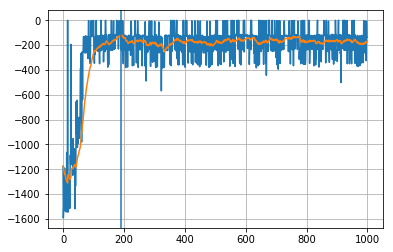

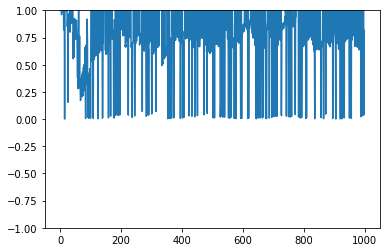

In [153]:
ts = [scores[0]]
gamma = 0.95
alpha = 0.75
max_score = [scores[0]]
min_scores = [scores[0]]

def soft_update(new, old, gamma):
    return gamma*old + (1-gamma)*new

for s in scores:
    ts.append(gamma*ts[-1]+(1-gamma)*s)
    count.append(count[-1]+int(s>ts[-1])-alpha)
    max_score.append(soft_update(max(ts[-1], s), max_score[-1], gamma))
    min_scores.append(soft_update(min(ts[-1], s), min_scores[-1], gamma))

plt.plot(scores)
plt.plot(ts)
# plt.plot(max_score)
# plt.plot(min_scores)
plt.axvline(np.argmax(ts))
plt.grid(True)
plt.show()

# plt.plot((np.asarray(ts)-np.asarray(min_scores))/np.clip(np.asarray(max_score) - np.asarray(min_scores), 1, None))
plt.plot(np.asarray(scores)/np.asarray(ts[:-1]))
plt.ylim(-1,1)
plt.show()

In [97]:
np.argwhere(np.any(np.array(count)<0))

array([[0]])

In [55]:
print(np.shape(agent.actor_local.model.get_weights()))
print(np.shape(agent.critic_local.model.get_weights()))

(6,)
(9,)


In [5]:
# env.close()
# env = gym.make('MountainCarContinuous-v0')
# state = env.reset()
# print(state)
state = agent.reset_episode()
Q = []
rewards = []
for i in range(300):
    action = agent.act(state) 
#     action = agent.actor_local.model.predict_on_batch([[state]])[0]
    Q.append(agent.critic_target.model.predict_on_batch([[state], [action]])[0])
    state, reward, done, _ = agent.task.step(action)
    
    rewards.append(reward)
#     agent.task.render()
    if done:
        break;
# agent.task.close()

In [10]:
env.close()

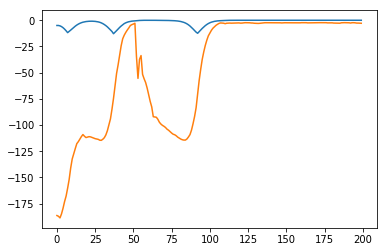

In [7]:
plt.plot(rewards)
# plt.plot(np.cumsum(rewards[::-1])[::-1])
plt.plot(Q)
plt.show()

In [8]:
len(agent.memory)

200000

In [214]:
actions = np.linspace(-1,1, 100).reshape(-1,1)
states = np.ones([100,3])*[1, 0.00, 0.0]
Q = agent.critic_target.model.predict_on_batch([states, actions])
plt.plot(actions, Q)
plt.show()

NameError: name 'agent' is not defined

In [23]:
agent.critic_target.model.predict_on_batch([[state], [action]])

array([[-2.9517896]], dtype=float32)

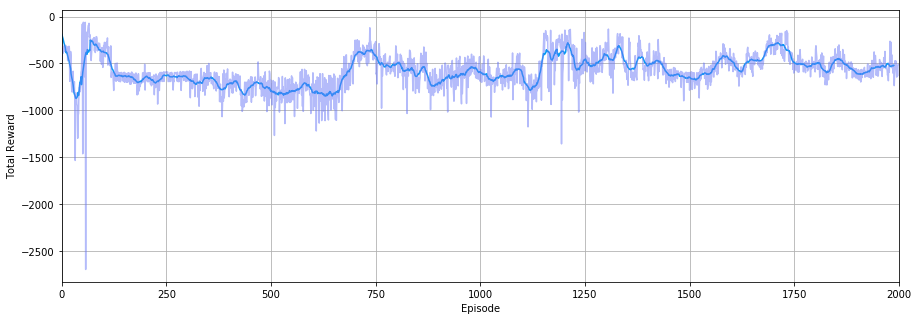

In [81]:
smooth = 21
plt.figure(figsize=(15,5))
plt.plot(np.convolve(score, np.ones(smooth)/smooth)[(smooth-1)//2:-smooth], color='xkcd:azure')
plt.plot(score, alpha=0.5, color='xkcd:cornflower')
plt.xlabel("Episode")
plt.ylabel('Total Reward')
plt.xlim(0, len(score))
plt.grid(True)
plt.show()

In [21]:
%load_ext autoreload
%autoreload 2
from ounoise import OUNoise
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


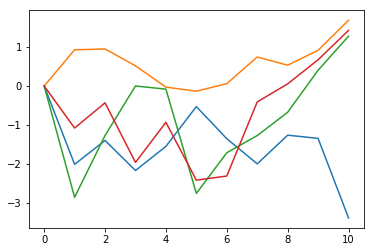

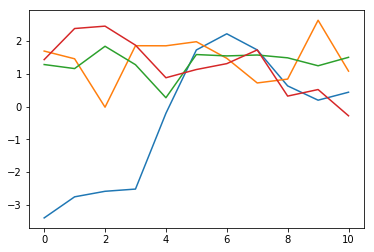

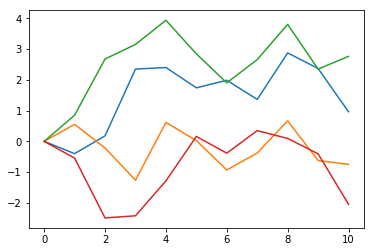

In [25]:
noise = OUNoise(4, 0.0, 0.15, 1.0)

plt.plot([noise.state]+[noise() for _ in range(10)])
plt.show()

plt.plot([noise.state]+[noise() for _ in range(10)])
plt.show()

noise.reset()
plt.plot([noise.state]+[noise() for _ in range(10)])
plt.show()



In [36]:
print("{:0>2d}".format(20))
import numpy as np
-np.inf > 100

print(np.linalg.norm([2.0, 0.0]))
print(np.linalg.norm([1.0, 1.0]))

20
2.0
1.4142135623730951


In [213]:
import numpy as np

def ranked_policy(scores, epsilon=0.1):
    alpha = len(scores)/(1+epsilon)
    p = np.exp(np.linspace(alpha, 0.0, len(scores), endpoint=True))
#     score_range = np.abs(np.max(scores) - np.min(scores))
#     p = np.exp(, 0.0, len(scores), endpoint=True))
#     p = np.exp(np.linspace(np.min(scores), np.max(scores), len(scores), endpoint=True))
#     p = np.exp(np.linspace(epsilon+score_range, 0.0, len(scores), endpoint=True))
    p = p/np.sum(p)
    return p[np.argsort(scores)]
    

print(ranked_policy(np.array([-250, -150, -50])))
print(ranked_policy(np.array([-1, -1, -1, ])))
print(ranked_policy(np.array([-100, -100, -100])))
print(ranked_policy(np.array([-232, -233, -50])))


[0.19356901 0.75692975 0.04950124]
[0.75692975 0.19356901 0.04950124]
[0.75692975 0.19356901 0.04950124]
[0.19356901 0.75692975 0.04950124]


In [235]:
test = np.array([-150, -150, -23])

p = np.max(test) - test + 0.1*(np.max(test) - np.min(test))
p = p**2

p = p/np.sum(p)
p
# -np.logspace(np.log10(250), np.log10(100), 5)
trial_mu = np.linspace(-5, 5, 4)
trial_sigma = np.linspace(1e-6, 5.0, 6)

print(trial_mu)
print(trial_sigma)

[-5.         -1.66666667  1.66666667  5.        ]
[1.0000000e-06 1.0000008e+00 2.0000006e+00 3.0000004e+00 4.0000002e+00
 5.0000000e+00]


In [240]:
test=np.array([1.1])

a = 0.0

a+= test
a

array([1.1])

In [255]:
from collections import deque
from collections import namedtuple

memory = deque(maxlen=10)
experience = namedtuple("Experience", field_names=["x", "Q"])

for i in range(10):
    memory.append(experience(*np.random.normal(0, 1, 2)))

In [258]:
np.random.choice(np.arange(10), p=None)

9

In [1]:
import numpy as np

In [6]:
test = np.arange(10)
%timeit np.square(test)

%timeit test ** 2

%timeit test * test


422 ns ± 3.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
442 ns ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
328 ns ± 5.65 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
np.maximum(1.0, test)



array([1., 1., 2., 3., 4., 5., 6., 7., 8., 9.])